# **Qu'est-ce que H2O :**

+ **`H2O` fait évoluer les statistiques, l'apprentissage automatique et les mathématiques via BigData. `H2O` est extensible et les utilisateurs peuvent construire des blocs en utilisant de simples legos mathématiques dans le noyau. `H2O` conserve des interfaces familières telles que `Python, R, Excel et JSON` afin que les passionnés et les experts du BigData puissent explorer, modéliser et évaluer des ensembles de données à l'aide d'une gamme d'algorithmes simples à avancés. La collecte de données est facile. La prise de décision est difficile. `H2O` permet d'obtenir rapidement et facilement des informations à partir de vos données grâce à une modélisation prédictive plus rapide et de meilleure qualité. `H2O` a une vision de la notation et de la modélisation en ligne sur une seule plateforme.**

<br/>

<img src="https://github.com/piyushpathak03/Automated-Machine-Learning/blob/master/H2O.ai/2020-05-31%20(7).png?raw=true"/>

In [ ]:
#Cette commande peut être pertinente uniquement sur les nœuds GPU. Mais le notebook fonctionnera aussi sur le CPU.
#Si vous utilisez le CPU, supprimez la commande partout où elle apparaît.
#nvidia-smi

In [ ]:
!apt-get install default-jre
!java -version

In [ ]:
!pip install h2o

In [9]:
import h2o

In [10]:
#vérification de version
print(h2o.__version__)

3.44.0.3


In [11]:
#démarrage du moteur h2o
#spécification du nombre de threads à utiliser
h2o.init(nthreads=1)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,20 mins 09 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 23 days
H2O_cluster_name:,H2O_from_python_unknownUser_lp7ojw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [13]:
h2o.cluster().show_status()

H2O_cluster_uptime:,22 mins 44 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 23 days
H2O_cluster_name:,H2O_from_python_unknownUser_lp7ojw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Shutdown the H2O cluster when you're done
h2o.cluster().shutdown()

In [14]:
from h2o.automl import H2OAutoML

In [15]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [16]:
churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [17]:
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [18]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [19]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No


In [20]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [21]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [22]:
aml

In [23]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
19:27:53.650: Project: AutoML_1_20240212_192753
19:27:53.658: Cross-validation disabled by user: no fold column nor nfolds > 1.
19:27:53.660: Setting stopping tolerance adaptively based on the training frame: 0.014256648712805027
19:27:53.661: Build control seed: 10
19:27:53.662: training frame: Frame key: AutoML_1_20240212_192753_training_py_2_sid_bfe0    cols: 21    rows: 4920  chunks: 8    size: 265961  checksum: 901034666698804433
19:27:53.662: validation frame: Frame key: py_4_sid_bfe0    cols: 21    rows: 1038  chunks: 8    size: 138371  checksum: 5054385782836631925
19:27:53.663: leaderboard frame: Frame key: py_4_sid_bfe0    cols: 21    rows: 1038  chunks: 8    size: 138371  checksum: 5054385782836631925
19:27:53.663: blending frame: NULL
19:27:53.663: response column: Churn
19:27:53.663: fold column: null
19:27:53.663: weights column: null
19:27:53.761: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w),

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240212_192753


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          17116                  6            10           8.075         27            33            29.35

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1175837467949309
RMSE: 0.3429048655165612
LogLoss: 0.3667403253537839
Mean Per-Class Error: 0.2029488242990578
AUC: 0.8859313152118852
AUCPR: 0.730500241621194
Gini: 0.7718626304237703

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33510822084016473
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3020  621    0.1706   (621.0/3641.0)
Yes    301   978    0.2353   (301.0/1279.0)
Total  3321  1599   0.1874   (922.0/4920.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.335108     0.679639  212
max f2                       0.189702     0.780704  279
max f0point5                 0.492678     0.680506  143
max accuracy                 0.455529     0.831098  159
max precision                0.904245     1         0
max recall                   0.0165078    1         394
max specificity              0.904245     1         0
max absolute_mcc             0.374229     0.556611  195
max min_per_class_accuracy   0.305116     0.801428  227
max mean_per_class_accuracy  0.253889     0.804994  249
max tns                      0.904245     3641      0
max fns                      0.904245     1274      0
max fps                      0.0108014    3641      399
max tps                      0.0165078    1279      394
max tnr                      0.904245     1         0
max fnr                      0.904245     0.996091  0
max fpr                      0.0108014    1         399
max tpr                      0.0165078    1         394

Gains/Lift Table: Avg response rate: 26.00 %, avg score: 26.12 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101626                   0.856447           3.76982     3.76982            0.98             0.878991   0.98                        0.878991            0.0383112       0.0383112                  276.982   276.982            0.0380365
2        0.0205285                   0.836807           3.31877     3.54206            0.862745         0.846454   0.920792                    0.862561            0.0344019       0.0727131                  231.877   254.206            0.0705159
3        0.0300813                   0.815447           3.43753     3.50886            0.893617         0.82754    0.912162                    0.85144             0.0328382       0.105551                   243.753   250.886            0.101981
4        0.0400407                   0.787971           3.68974     3.55386            0.959184         0.801592   0.923858                    0.839041            0.0367475       0.142299                   268.974   255.386            0.138179
5        0.05                        0.764952           3.0617      3.45582            0.795918         0.778129   0.898374           

In [25]:
lb = aml.leaderboard

In [26]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20240212_192753,0.835819,0.429757,0.65944,0.257857,0.373555,0.139543
GLM_1_AutoML_1_20240212_192753,0.832303,0.434403,0.655654,0.241504,0.375391,0.140918
GBM_2_AutoML_1_20240212_192753,0.829715,0.440216,0.643342,0.255659,0.377812,0.142742
XGBoost_2_AutoML_1_20240212_192753,0.826225,0.453119,0.633587,0.256724,0.383804,0.147306
XGBoost_3_AutoML_1_20240212_192753,0.825327,0.447125,0.641677,0.268237,0.379746,0.144207
XGBoost_1_AutoML_1_20240212_192753,0.824892,0.453944,0.62118,0.248365,0.384256,0.147653
GBM_3_AutoML_1_20240212_192753,0.82275,0.449054,0.628555,0.249336,0.382042,0.145956
XRT_1_AutoML_1_20240212_192753,0.819112,0.445474,0.631152,0.244294,0.380072,0.144455
GBM_4_AutoML_1_20240212_192753,0.818016,0.460257,0.623402,0.2521,0.384078,0.147516
DRF_1_AutoML_1_20240212_192753,0.817351,0.513652,0.618263,0.257814,0.383687,0.147216


In [27]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [28]:
churn_pred.head()

predict,No,Yes
No,0.830881,0.169119
No,0.951871,0.048129
Yes,0.430353,0.569647
No,0.955935,0.0440651
No,0.695307,0.304693
No,0.793703,0.206297
Yes,0.18657,0.81343
No,0.970625,0.0293746
Yes,0.419369,0.580631
No,0.956771,0.043229


In [29]:
aml.leader.model_performance(churn_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13740045558202862
RMSE: 0.37067567438669163
LogLoss: 0.4237227529425752
Mean Per-Class Error: 0.2212887432022153
AUC: 0.8497105728488974
AUCPR: 0.6823779058379902
Gini: 0.6994211456977948

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34922695033793505
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     641   135    0.174    (135.0/776.0)
Yes    83    226    0.2686   (83.0/309.0)
Total  724   361    0.2009   (218.0/1085.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.349227     0.674627  197
max f2                       0.180341     0.765766  276
max f0point5                 0.372019     0.646781  188
max accuracy                 0.372019     0.8       188
max precision                0.908137     1         0
max recall                   0.0155208    1         395
max specificity              0.908137     1         0
max absolute_mcc             0.349227     0.533915  197
max min_per_class_accuracy   0.293406     0.776699  223
max mean_per_class_accuracy  0.319142     0.781676  211
max tns                      0.908137     776       0
max fns                      0.908137     308       0
max fps                      0.0105933    776       399
max tps                      0.0155208    309       395
max tnr                      0.908137     1         0
max fnr                      0.908137     0.996764  0
max fpr                      0.0105933    1         399
max tpr                      0.0155208    1         395

Gains/Lift Table: Avg response rate: 28.48 %, avg score: 27.03 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101382                   0.85997            2.8729     2.8729             0.818182         0.878672   0.818182                    0.878672            0.0291262       0.0291262                  187.29    187.29             0.0265489
2        0.0202765                   0.844466           2.8729     2.8729             0.818182         0.851414   0.818182                    0.865043            0.0291262       0.0582524                  187.29    187.29             0.0530978
3        0.0304147                   0.829353           3.19212    2.97931            0.909091         0.836693   0.848485                    0.855593            0.0323625       0.0906149                  219.212   197.931            0.0841716
4        0.040553                    0.815546           3.19212    3.03251            0.909091         0.82026    0.863636                    0.84676             0.0323625       0.122977                   219.212   203.251            0.115245
5        0.0506912                   0.771798           2.55369    2.93675            0.727273         0.792018   0.836364                    0.835811            0.02589         0.148867                   155.369   193.675            0.137269
6        0.100461                    0.660787           2.60098    2.7704             0.740741         0.718847   0.788991                    0.777866            0.12945         0.278317                   160.098   177.04             0.248678
7        0.15023                     0.592129           2.27586    2.60657            0.648148         0.624376   0.742331                    0.727017            0.113269        0.391586                   127.586   160.657            0.337462
8        0.2   

In [30]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [31]:
model_ids

['GBM_1_AutoML_1_20240212_192753',
 'GLM_1_AutoML_1_20240212_192753',
 'GBM_2_AutoML_1_20240212_192753',
 'XGBoost_2_AutoML_1_20240212_192753',
 'XGBoost_3_AutoML_1_20240212_192753',
 'XGBoost_1_AutoML_1_20240212_192753',
 'GBM_3_AutoML_1_20240212_192753',
 'XRT_1_AutoML_1_20240212_192753',
 'GBM_4_AutoML_1_20240212_192753',
 'DRF_1_AutoML_1_20240212_192753']

In [32]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20240212_192753


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.08698325827617143
RMSE: 0.29492924282982086
LogLoss: 0.28579959356154944
Mean Per-Class Error: 0.14037537050346813
AUC: 0.9378516199507864
AUCPR: 0.8506721769091592
Gini: 0.8757032399015727

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3722251193089919
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3265  376    0.1033   (376.0/3641.0)
Yes    227   1052   0.1775   (227.0/1279.0)
Total  3492  1428   0.1226   (603.0/4920.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.372225     0.777244  206
max f2                       0.19187      0.83737   277
max f0point5                 0.539587     0.799624  148
max accuracy                 0.465041     0.885976  174
max precision                0.983002     1         0
max recall                   0.0129664    1         386
max specificity              0.983002     1         0
max absolute_mcc             0.450384     0.698488  179
max min_per_class_accuracy   0.315761     0.8624    227
max mean_per_class_accuracy  0.282397     0.86429   240
max tns                      0.983002     3641      0
max fns                      0.983002     1274      0
max fps                      0.00177401   3641      399
max tps                      0.0129664    1279      386
max tnr                      0.983002     1         0
max fnr                      0.983002     0.996091  0
max fpr                      0.00177401   1         399
max tpr                      0.0129664    1         386

Gains/Lift Table: Avg response rate: 26.00 %, avg score: 26.27 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101626                   0.949741           3.84676    3.84676            1                0.962768    1                           0.962768            0.039093        0.039093                   284.676   284.676            0.039093
2        0.020122                    0.928003           3.68974    3.76904            0.959184         0.939473    0.979798                    0.951238            0.0367475       0.0758405                  268.974   276.904            0.0752912
3        0.0300813                   0.906629           3.84676    3.79477            1                0.917638    0.986486                    0.940114            0.0383112       0.114152                   284.676   279.477            0.113602
4        0.0400407                   0.884236           3.61124    3.74912            0.938776         0.894517    0.974619                    0.928772            0.0359656       0.150117                   261.124   274.912            0.148744
5        0.05                        0.863194           3.76825    3.75293            0.979592         0.87545     0.97561                     0.918151            0.0375293       0.187647                   276.825   275.293            0.185999
6        0.1                         0.758495           3.34636    3.54965            0.869919         0.811664    0.922764                    0.864907            0.167318        0.354965                   234.636   254.965            0.344528
7        0.15                        0.654843           3.25254    3.45

In [33]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [34]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_2_AutoML_1_20240212_192753',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_2_AutoML_1_20240212_192753'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240212_192753_training_py_2_sid_bfe0',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240212_192753_training_py_2_sid_bfe0'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240212_192753_training_py_2_sid_bfe0',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240212_192753_training_py_2_sid_bfe0'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schem

In [35]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 5.0,
  'nthread': 2,
  'seed': 13,
  'max_depth': 10,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 30)

In [36]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20240212_192753


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.08698325827617143
RMSE: 0.29492924282982086
LogLoss: 0.28579959356154944
Mean Per-Class Error: 0.14037537050346813
AUC: 0.9378516199507864
AUCPR: 0.8506721769091592
Gini: 0.8757032399015727

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3722251193089919
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3265  376    0.1033   (376.0/3641.0)
Yes    227   1052   0.1775   (227.0/1279.0)
Total  3492  1428   0.1226   (603.0/4920.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.372225     0.777244  206
max f2                       0.19187      0.83737   277
max f0point5                 0.539587     0.799624  148
max accuracy                 0.465041     0.885976  174
max precision                0.983002     1         0
max recall                   0.0129664    1         386
max specificity              0.983002     1         0
max absolute_mcc             0.450384     0.698488  179
max min_per_class_accuracy   0.315761     0.8624    227
max mean_per_class_accuracy  0.282397     0.86429   240
max tns                      0.983002     3641      0
max fns                      0.983002     1274      0
max fps                      0.00177401   3641      399
max tps                      0.0129664    1279      386
max tnr                      0.983002     1         0
max fnr                      0.983002     0.996091  0
max fpr                      0.00177401   1         399
max tpr                      0.0129664    1         386

Gains/Lift Table: Avg response rate: 26.00 %, avg score: 26.27 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101626                   0.949741           3.84676    3.84676            1                0.962768    1                           0.962768            0.039093        0.039093                   284.676   284.676            0.039093
2        0.020122                    0.928003           3.68974    3.76904            0.959184         0.939473    0.979798                    0.951238            0.0367475       0.0758405                  268.974   276.904            0.0752912
3        0.0300813                   0.906629           3.84676    3.79477            1                0.917638    0.986486                    0.940114            0.0383112       0.114152                   284.676   279.477            0.113602
4        0.0400407                   0.884236           3.61124    3.74912            0.938776         0.894517    0.974619                    0.928772            0.0359656       0.150117                   261.124   274.912            0.148744
5        0.05                        0.863194           3.76825    3.75293            0.979592         0.87545     0.97561                     0.918151            0.0375293       0.187647                   276.825   275.293            0.185999
6        0.1                         0.758495           3.34636    3.54965            0.869919         0.811664    0.922764                    0.864907            0.167318        0.354965                   234.636   254.965            0.344528
7        0.15                        0.654843           3.25254    3.45

In [37]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [38]:
out.confusion_matrix()

,No,Yes,Error,Rate
No,3265.0,376.0,0.1033,(376.0/3641.0)
Yes,227.0,1052.0,0.1775,(227.0/1279.0)
Total,3492.0,1428.0,0.1226,(603.0/4920.0)


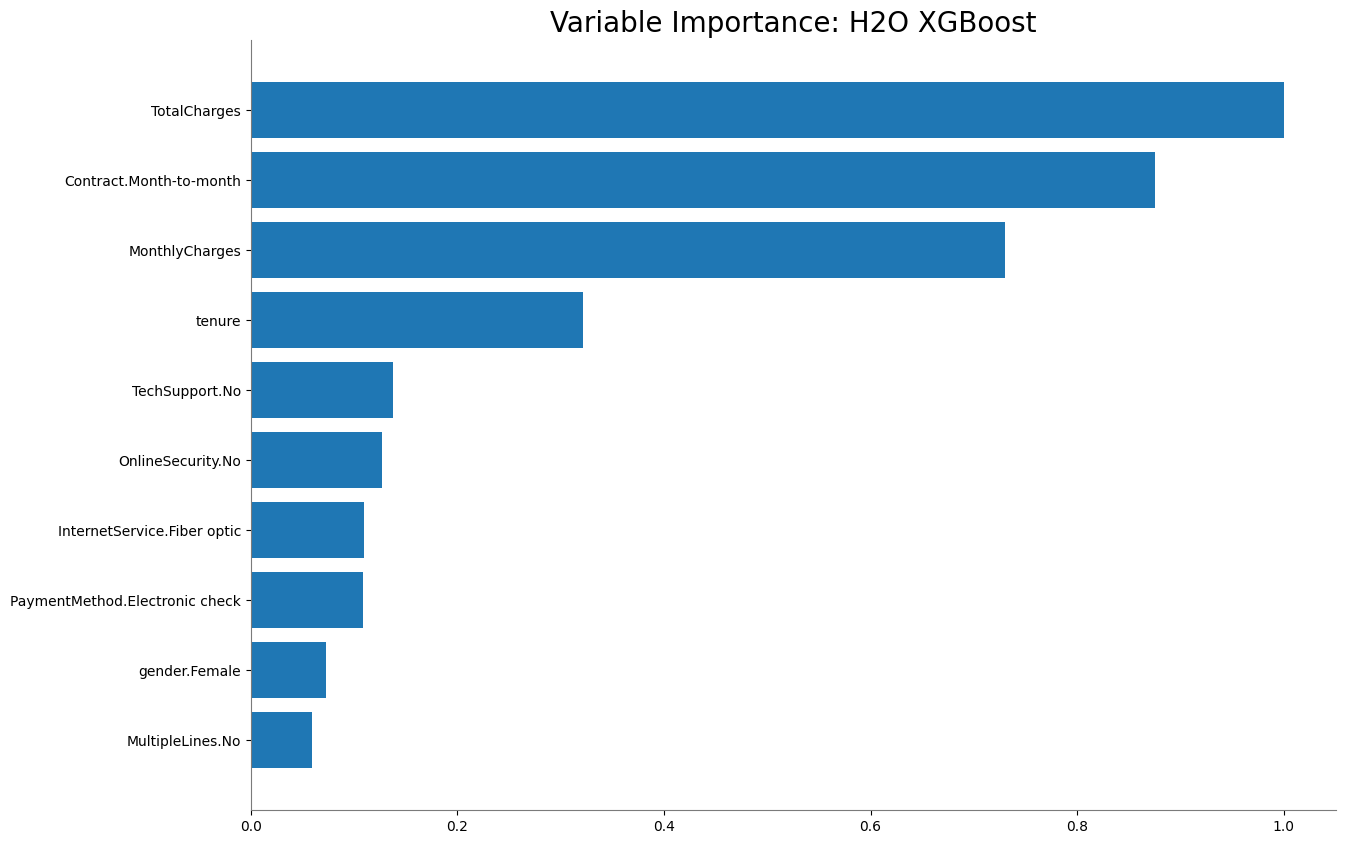

<Figure size 640x480 with 0 Axes>

In [39]:
out.varimp_plot()